In [27]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import torchvision.datasets as datasets
import random
import math

## CIFAR10 from Torchvision

In [28]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))     # -1 to +1
])

In [29]:
ciphar_trainset = datasets.CIFAR10(root='./data', train=True, download=True, transform=None)

Files already downloaded and verified


In [30]:
print(ciphar_trainset)

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./data
    Split: Train


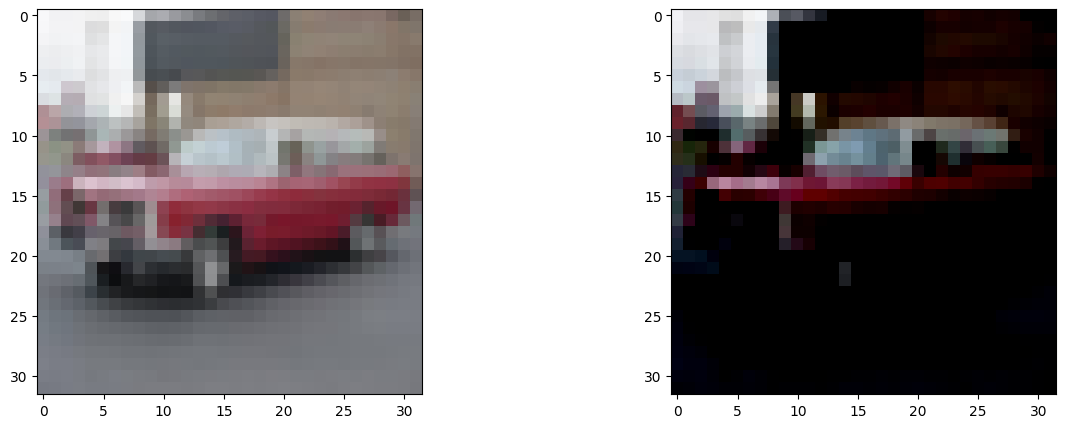

In [31]:
sample_img = ciphar_trainset[2389][0]
transformed_image = transform(sample_img)

fig, axes = plt.subplots(1, 2, figsize=(15,5))
axes[0].imshow(sample_img)
axes[1].imshow(transformed_image.permute(1,2,0).numpy())
plt.show()

## Variance Schedulers

In [73]:
BETA_START = torch.tensor(0.001)
BETA_END = torch.tensor(0.999)
TIME = 1000
S = torch.tensor(0.008)

In [33]:
def linear_sch(beta_start=BETA_START, beta_end=BETA_END, time=TIME):
    t = torch.linspace(beta_start, beta_end, time)
    return t

In [34]:
def quadratic_sch(beta_start=BETA_START, beta_end=BETA_END, time=TIME):
    t = torch.linspace(0, 1, time)
    return (beta_start + (beta_end - beta_start) * t**2)

In [82]:
def cosine_sch(beta_start=BETA_START, beta_end=BETA_END, time=TIME, s=S):
    t = torch.linspace(0, 1, time)
    inside = ((t+s)/(1+s)) * (math.pi/2)
    alpha = (torch.cos(inside))**2
    beta = 1 - (alpha / (alpha - 1))
    # Optionally clamp beta values to the desired range
    beta = torch.clamp(beta, min=beta_start, max=beta_end)
    return beta

In [36]:
def expon_sch(beta_start=BETA_START, beta_end=BETA_END, time=TIME):
    t = torch.linspace(0, 1, time)
    return (beta_start * (beta_end / beta_start)**t)

In [88]:
def sigmoid_sch(beta_start=BETA_START, beta_end=BETA_END, time=TIME, a=10):
    t = torch.linspace(0, 1, time)
    sigmoid_values = torch.sigmoid(a * (t - 0.5))
    return beta_start + (beta_end - beta_start) * sigmoid_values

In [53]:
def forward_diffusion(image, beta, time_step):
    noise = torch.randn_like(image)
    betas = beta
    alphas = 1 - betas
    alpha_bar = torch.cumprod(alphas, dim=0)
    noisy_image = torch.sqrt(1 - alpha_bar[time_step-1]) * noise + torch.sqrt(alpha_bar[time_step-1]) * image
    return noisy_image

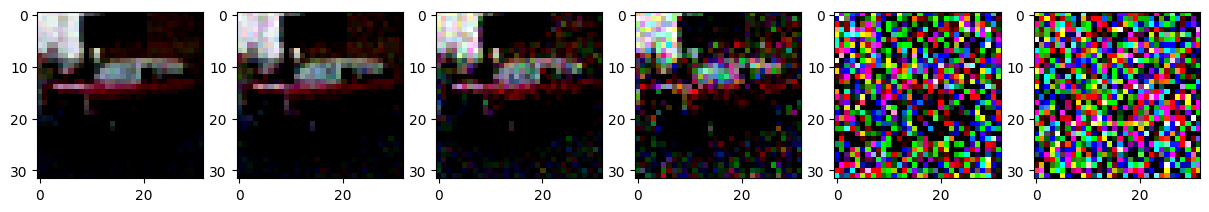

In [67]:
# Linear Scheduler

noisy_images = []
for t in [1, 2, 5, 10, 50, 1000]:
    noisy_image = forward_diffusion(transformed_image, linear_sch(beta_start=BETA_START, beta_end=BETA_END, time=TIME), t)
    noisy_images.append(noisy_image)

fig, axes = plt.subplots(1, 6, figsize=(15,5))
idx = 0
for noisy_image in noisy_images:
    axes[idx].imshow(noisy_image.permute(1,2,0).numpy())
    idx = idx+1
plt.show()

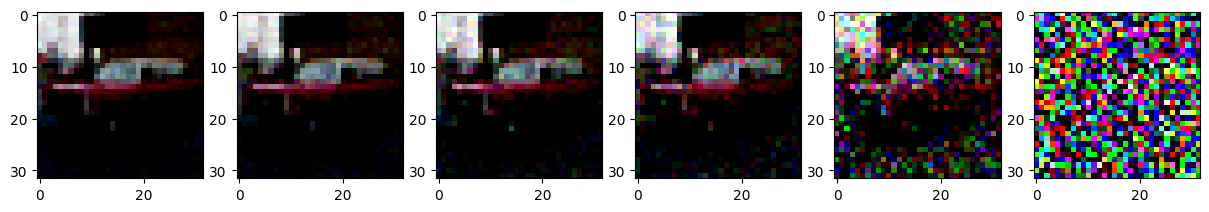

In [80]:
# Quadratic Scheduler

noisy_images = []
for t in [1, 2, 5, 10, 50, 1000]:
    noisy_image = forward_diffusion(transformed_image, quadratic_sch(beta_start=BETA_START, beta_end=BETA_END, time=TIME), t)
    noisy_images.append(noisy_image)

fig, axes = plt.subplots(1, 6, figsize=(15,5))
idx = 0
for noisy_image in noisy_images:
    axes[idx].imshow(noisy_image.permute(1,2,0).numpy())
    idx = idx+1
plt.show()

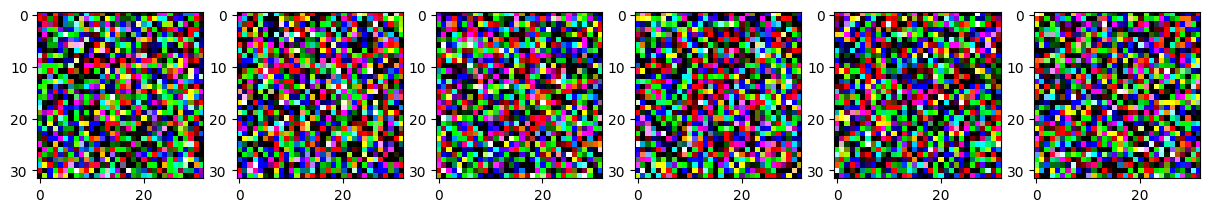

In [83]:
# Cosine Scheduler

noisy_images = []
for t in [1, 2, 5, 10, 50, 1000]:
    noisy_image = forward_diffusion(transformed_image, cosine_sch(beta_start=BETA_START, beta_end=BETA_END, time=TIME, s=S), t)
    noisy_images.append(noisy_image)

fig, axes = plt.subplots(1, 6, figsize=(15,5))
idx = 0
for noisy_image in noisy_images:
    axes[idx].imshow(noisy_image.permute(1,2,0).numpy())
    idx = idx+1
plt.show()

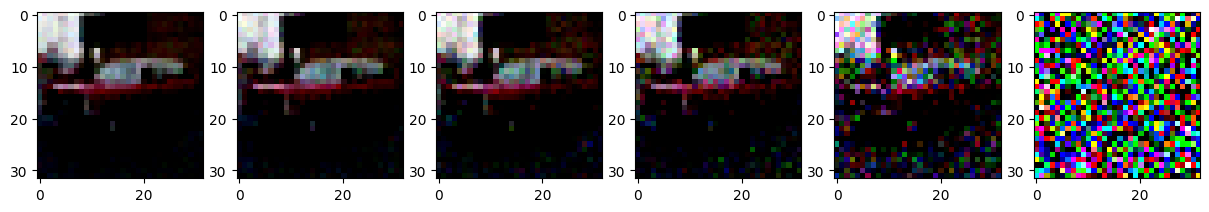

In [84]:
# Exponential Scheduler

noisy_images = []
for t in [1, 2, 5, 10, 50, 1000]:
    noisy_image = forward_diffusion(transformed_image, expon_sch(beta_start=BETA_START, beta_end=BETA_END, time=TIME), t)
    noisy_images.append(noisy_image)

fig, axes = plt.subplots(1, 6, figsize=(15,5))
idx = 0
for noisy_image in noisy_images:
    axes[idx].imshow(noisy_image.permute(1,2,0).numpy())
    idx = idx+1
plt.show()

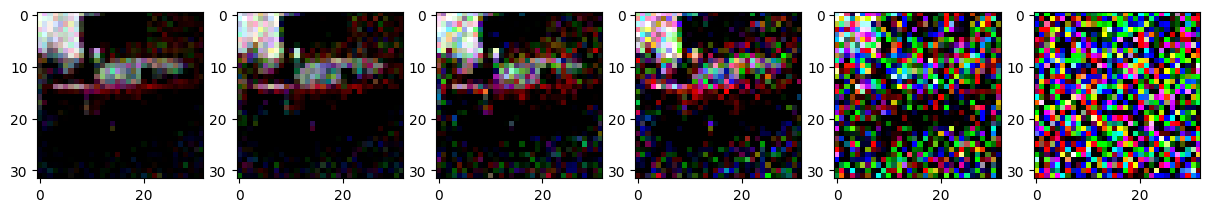

In [89]:
# Sigmoid Scheduler

noisy_images = []
for t in [1, 2, 5, 10, 50, 1000]:
    noisy_image = forward_diffusion(transformed_image, sigmoid_sch(beta_start=BETA_START, beta_end=BETA_END, time=TIME), t)
    noisy_images.append(noisy_image)

fig, axes = plt.subplots(1, 6, figsize=(15,5))
idx = 0
for noisy_image in noisy_images:
    axes[idx].imshow(noisy_image.permute(1,2,0).numpy())
    idx = idx+1
plt.show()